In [3]:
import sklearn
sklearn.__version__ # chek the sklearn version

'1.5.1'

## Preparing the tools

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay


heartDis = pd.read_csv("heart.csv")
heartDis


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
heartDis.shape

(1025, 14)

In [6]:
# Check how many classes do i have
heartDis["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [7]:
# Do i have missing values?
heartDis.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heartDis.describe() # get a look about some similarities in the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Let's compare some data

In [9]:
# Compare target column with sex column
pd.crosstab(heartDis.target,heartDis.sex)

sex,0,1
target,,
0,86,413
1,226,300


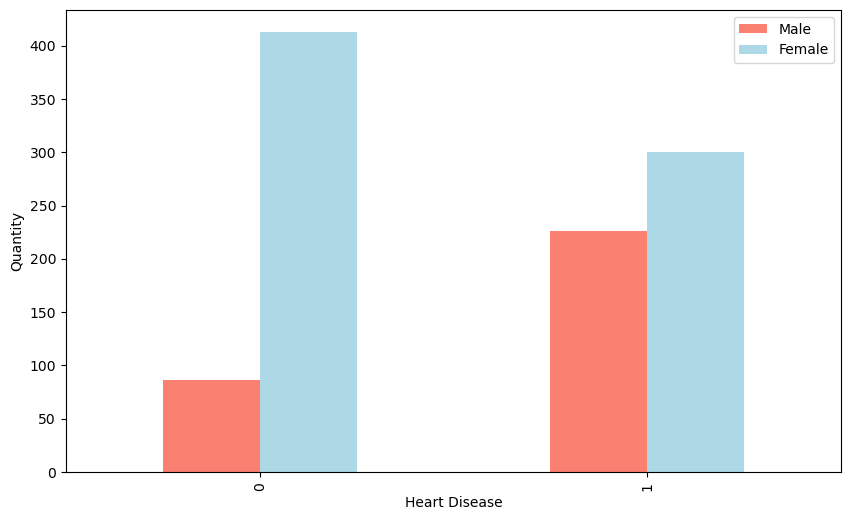

In [32]:
pd.crosstab(heartDis.target,heartDis.sex).plot(kind = "bar",
                                              figsize=(10,6),
                                              color=["salmon","lightblue"],
                                              ylabel="Quantity",
                                              xlabel="Heart Disease"
                                              )
plt.legend(["Male","Female"])
plt.show()

# Age vs Max Rate for heart Disease

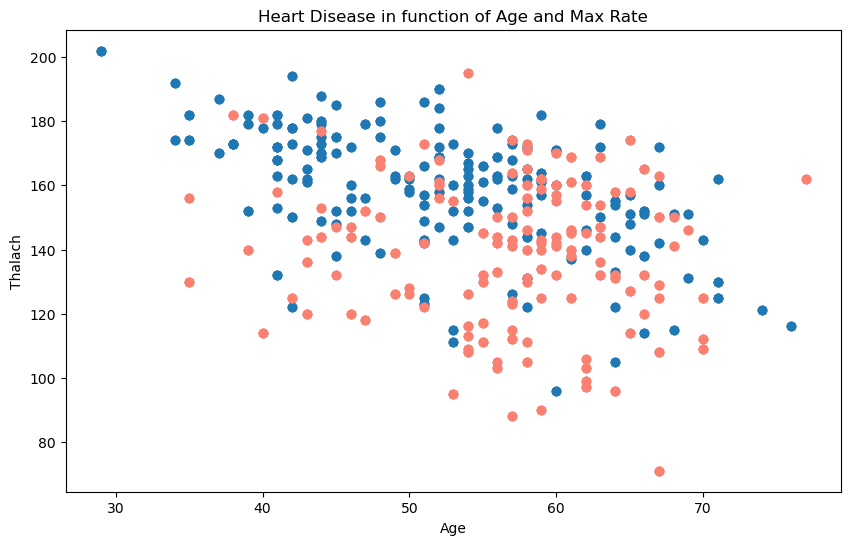

In [46]:
plt.figure(figsize=(10,6))
# Positive examples
plt.scatter(heartDis.age[heartDis.target==1],
           heartDis.thalach[heartDis.target==1])
#Negative examples
plt.scatter(heartDis.age[heartDis.target==0],
           heartDis.thalach[heartDis.target==0],
           c="salmon")
plt.title("Heart Disease in function of Age and Max Rate")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.show()

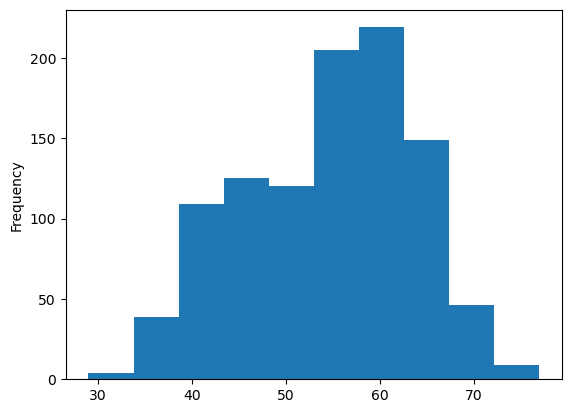

In [52]:
# Check the distribution of the age column with a histogram
heartDis.age.plot.hist()
plt.show()

# Comparing chest pain with target
3. cp 	Chest pain type
   * 0: Typical angina (chest pain)
   * 1: Atypical angina (chest pain not related to heart),
   * 2: Non-anginal pain (typically esophageal spasms (non heart related),
   * 3: Asymptomatic (chest pain not showing signs of disease)

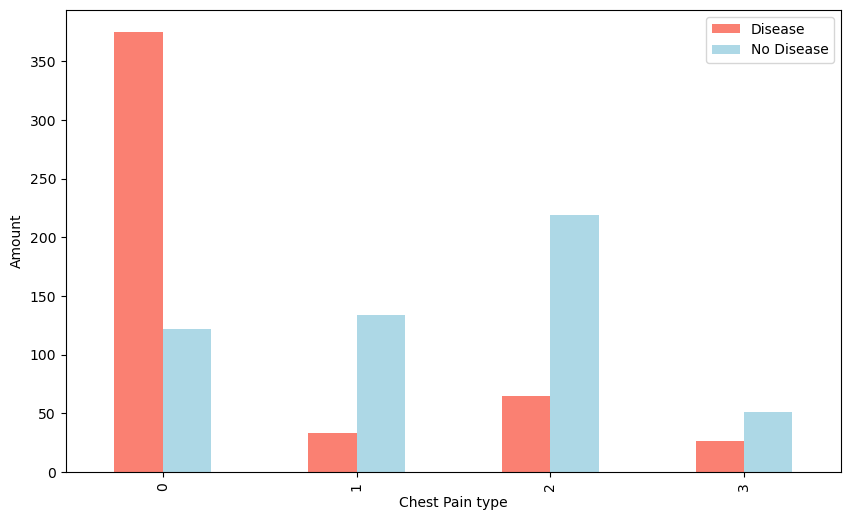

In [61]:
pd.crosstab(heartDis.cp,heartDis.target).plot(kind="bar",
                                             figsize=(10,6),
                                             color=["Salmon","lightblue"])
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["Disease", "No Disease"])
plt.show()

In [2]:
# Make a correlation MAtrix to visualize how all the features are related to the target
heartDis.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


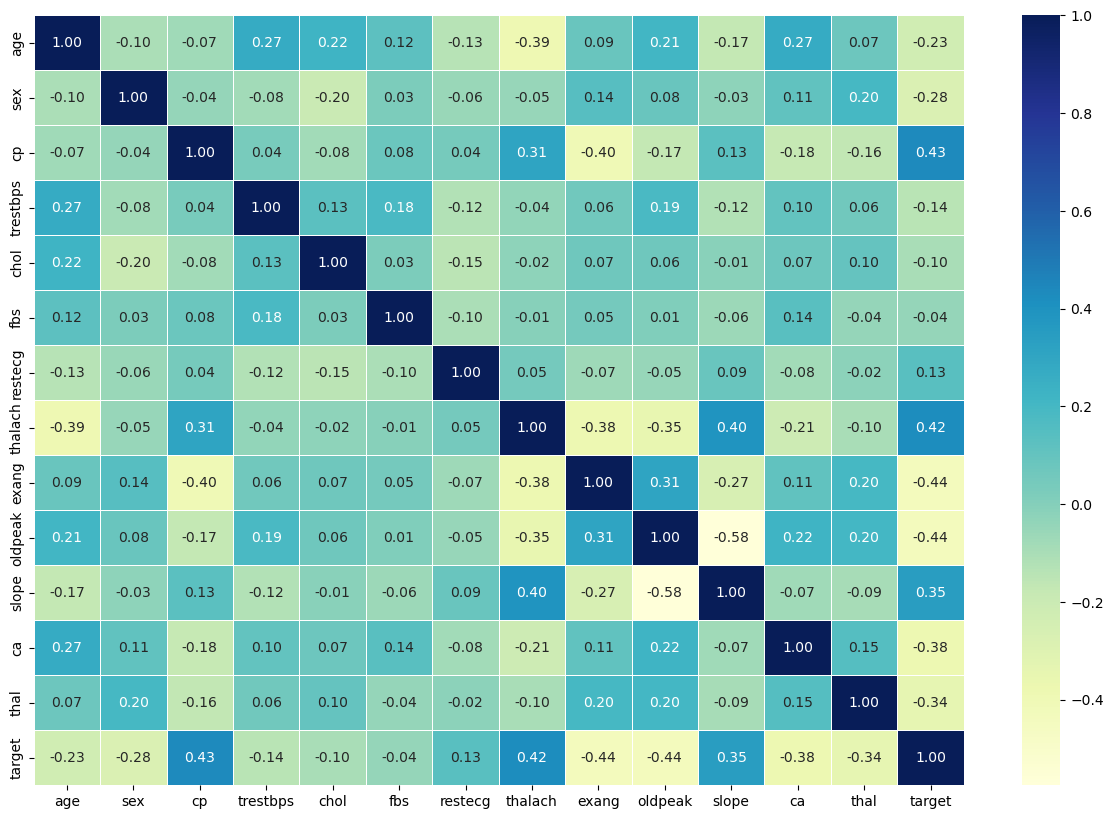

In [2]:
# Make a correlation matrix undertandable 
corrMatrix = heartDis.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corrMatrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")
plt.show()

## Modeling

In [3]:
# Split Data
np.random.seed(42)

X = heartDis.drop("target", axis=1)
y = heartDis["target"]

xTrain,xTest,yTrain,yTest = train_test_split(X,y,test_size=0.2)

In [5]:
# Initialize model
models = {"Random Forest": RandomForestClassifier(n_estimators = 100),
         "KNN": KNeighborsClassifier(),
         "Logistic Regression":LogisticRegression(max_iter=2000)}

In [6]:
# Create a function to fit and score models
def fit_and_score(models,xTrain,xTest,yTrain,yTest):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        # Fit the model
        model.fit(xTrain,yTrain)
        #Evaluate the model and append its score tod model_scores
        model_scores[name] = model.score(xTest,yTest)
    return model_scores

In [7]:
model_scores = fit_and_score(models,xTrain,xTest,yTrain,yTest)
model_scores

{'Random Forest': 0.9853658536585366,
 'KNN': 0.7317073170731707,
 'Logistic Regression': 0.7951219512195122}

### Model Comparison

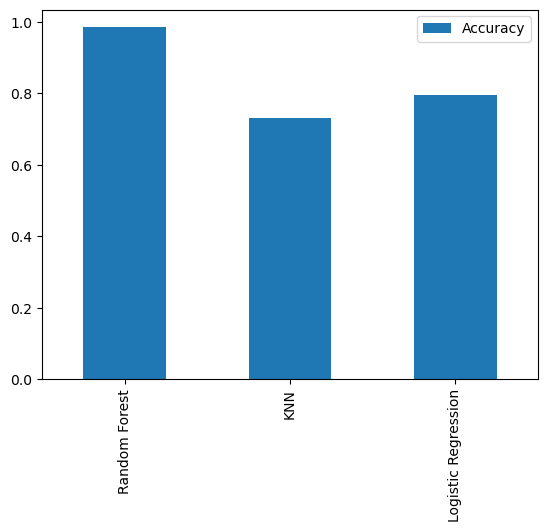

In [25]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar()
plt.show()

### Keep experimenting with the models

We could experiment with the models: 

* Hyperparameter tunning
* Feature importance
* Condusion Matrix
* Cross-valdiation
* Precision
* Recall
* f1 Scorem
* Classsification report ROC Cruve
* Area unde the curve (AUC)

Though we can see Random Forest has a clear advantage lets try to tune KNN, just to experiment a bit

In [44]:
# Let´s tune KNN 
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Set up KNN instance 
knn = KNeighborsClassifier()

# Loop thorugh different n=neighbors

for i in neighbors:
    #Add the parameter modifier
    knn.set_params(n_neighbors=i)
    # Fit the model
    knn.fit(xTrain,yTrain)
    #Score the model
    scoreTest = knn.score(xTest,yTest)
    #Save the result in Train socores and test scores
    train_scores.append(scoreTrain)
    test_scores.append(scoreTest)


In [45]:
test_scores

[0.9853658536585366,
 0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073]

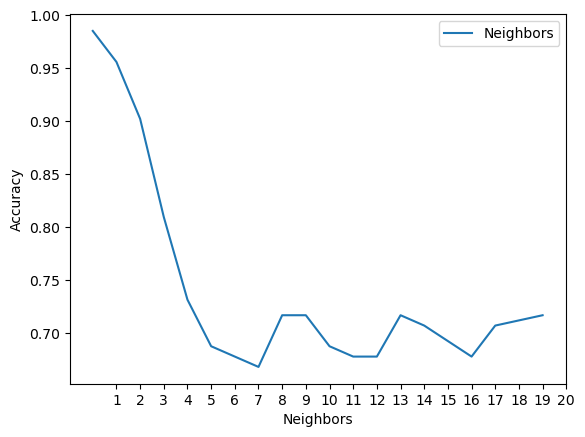

In [49]:
plt.plot(test_scores)
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,21,1))
plt.legend(["Neighbors","Accuaracy"])
plt.show()

## Hyperparameter tuning with Randomized Search CV


In [5]:
# Create hyper parameter grid for Logistic Regression

LRparameters = {"C": np.logspace(-4,4,20),
               "solver":["liblinear"]}
# Create hyper parameter grid for Random Forest Calssififer
RandomForestClassifier()
RFparameters = {"n_estimators":np.arange(10,1000,50),
               "max_depth":[None,3,5,10],
               "min_samples_split":np.arange(2,20,2),
               "min_samples_leaf":np.arange(1,20,2)}


In [7]:
# Tune logistic Regression

np.random.seed(32)

rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                              param_distributions=LRparameters,
                              cv=5,
                              n_iter=20,
                              verbose=True)

# Fit the hypermarameter seach m,odel for logistic Regression
rs_log_reg. fit(xTrain,yTrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [8]:
rs_log_reg.score(xTest,yTest)

0.7853658536585366

### Not good enough, lets get back to Random Forest and try to improve it even more

In [6]:
# Lets tune Random Forest Classifier
np.random.seed(32)

rf_log_reg= RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=RFparameters,
                              cv=5,
                              n_iter=20,
                              verbose=True)
  
# Fit the hypermarameter seach m,odel for logistic Regression
rf_log_reg.fit(xTrain,yTrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [7]:
# To visualize all parameters
rf_log_reg.best_params_

{'n_estimators': 460,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

In [8]:
rf_log_reg.score(xTest,yTest) # same as the Random forest with default parameters

0.9853658536585366

In [ ]:
np.random.seed(32)

rf_log_reg= GridSearchCV(RandomForestClassifier(),
                              param_grid=RFparameters,
                              cv=5,
                              verbose=True)

# Fit the hypermarameter seach model for our RFClassifier
rf_log_reg.fit(xTrain,yTrain)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


### Battery went out before finishing so we are going to stick with the Randomize Search parameter values

## Evaluating the model

* ROC curve and AUC score
* confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score

In [9]:
# Make predictions
rf_log_reg.predict(xTest)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [10]:
yTest

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

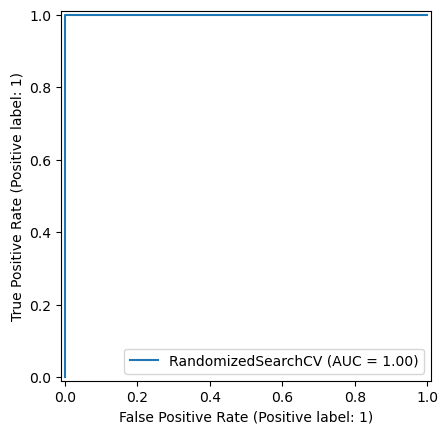

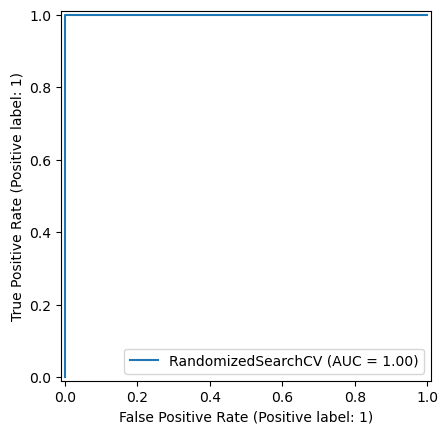

In [11]:
# Plot Roc curve and calculate AUC from estimators

display = RocCurveDisplay.from_estimator(rf_log_reg,xTest,yTest)
display.plot()
plt.show()

In [12]:
# confusion Matrix
yPreds = rf_log_reg.predict(xTest)
print(confusion_matrix(yTest,yPreds))

[[102   0]
 [  3 100]]


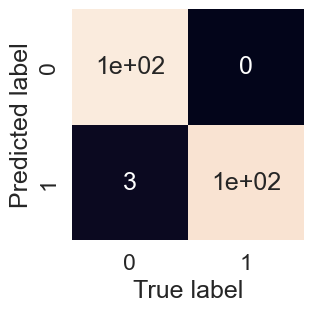

In [13]:
sns.set(font_scale=1.5)
def plot_conf_mat(yTest,yPreds):
    """
    Plot a confusion matrix using seaborns heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(yTest,yPreds),
                     annot = True,
                     cbar = False
                    )
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom, top = ax.get_ylim()
    plt.show()
    
plot_conf_mat(yTest,yPreds)

In [14]:
# Simple classification report 
classification_report(yTest,yPreds) #IDK why is displayed like this, I'll fix it later

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99       102\n           1       1.00      0.97      0.99       103\n\n    accuracy                           0.99       205\n   macro avg       0.99      0.99      0.99       205\nweighted avg       0.99      0.99      0.99       205\n'

## Calculate evaluation metrics using cross validation

In [15]:
# Check best hyperparameters
rf_log_reg.best_params_

{'n_estimators': 460,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

In [16]:
# Accuracy
model = RandomForestClassifier(n_estimators=100,
                              min_samples_split=2,
                               min_samples_leaf = 1,
                               max_depth = None
                              )
cv_acc = cross_val_score(model,
                        X,
                        y,
                        cv = 5,
                        scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.9970731707317073

In [17]:
# Precision
cv_prec = cross_val_score(model,
                        X,
                        y,
                        cv = 5,
                        scoring = "precision")
cv_prec = np.mean(cv_prec)
cv_acc, cv_prec

(0.9970731707317073, 0.9944954128440366)

In [18]:
# recall
cv_recall = cross_val_score(model,
                        X,
                        y,
                        cv = 5,
                        scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_acc, cv_prec, cv_recall

(0.9970731707317073, 0.9944954128440366, 1.0)

In [19]:
# F1
cv_f1 = cross_val_score(model,
                        X,
                        y,
                        cv = 5,
                        scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_acc, cv_prec, cv_recall, cv_f1

(0.9970731707317073, 0.9944954128440366, 1.0, 0.9972093023255815)

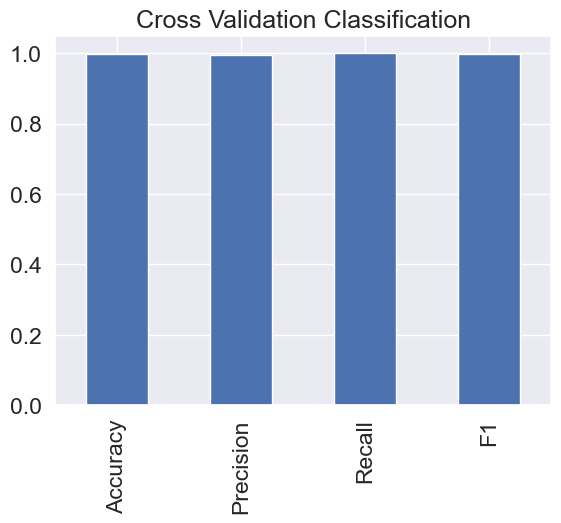

In [20]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
             "Precision":cv_prec,
             "Recall": cv_recall,
             "F1":cv_f1},
            index=[0])
cv_metrics.T.plot.bar(title = "Cross Validation Classification",
                     legend = False);
plt.show()

### We can see it is too good, I'm starting to be kind of not entierly sure about it.But I double cheked every thing so... lets wrap it up and identify the most important features 

In [36]:
# Feature importance

from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf_log_reg, xTest, yTest, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index = heartDis.drop("target",axis=1).columns)
forest_importances

age         0.041463
sex         0.012683
cp          0.080488
trestbps    0.006341
chol        0.014146
fbs         0.000000
restecg     0.000000
thalach     0.020976
exang       0.008780
oldpeak     0.013171
slope       0.000000
ca          0.080000
thal        0.065854
dtype: float64

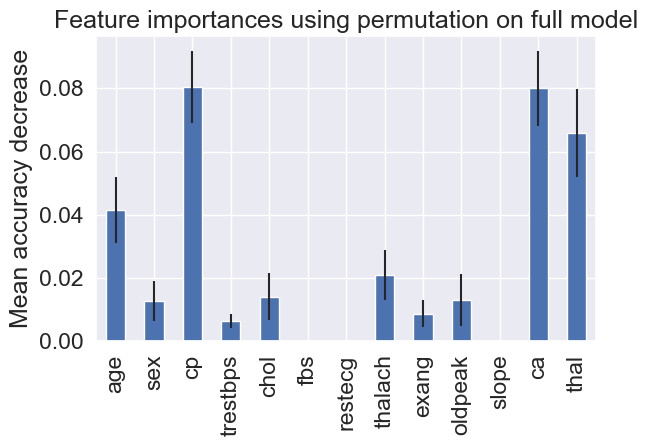

In [37]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# With this we can assume that  Chest pain type (CP), Number of major vessels(ca ) and Thalium stress result (thal) are the most important features in our data
